In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as sk_pre
import sklearn.decomposition as sk_dec
import sklearn.model_selection as sk_mos
import prince

In [11]:
maestro_data = pd.read_csv("../data/maestro-calculated.csv", low_memory=False)

In [12]:
maestro_data.columns

Index(['business_date', 'parent_uid', 'as-of-date', 'as-of-datetime',
       'batch-workflow', 'skip-mdl-out', 'workflow_name', 'flow-type',
       'rules-branch', 'uid', 'business-date', 'business-day',
       'event_success_time', 'cmd_success_time', 'batch-instance-seq',
       'cmd_processing_time', 'ib-run-id', 'processing-location', 'hac-run-id',
       'regulatory-approaches', 'event_processing_time', 'job_name'],
      dtype='object')

In [90]:
jobs = maestro_data["job_name"].unique()
business_day = maestro_data["business-day"].unique()
print(business_day)

['BD0' 'BD1' 'BD2' 'BD3' 'BD4' 'BD5' nan 'BD6' 'BD7' 'BD8' 'BD9']


run-b3std-calculation, has no entries for BD == nan


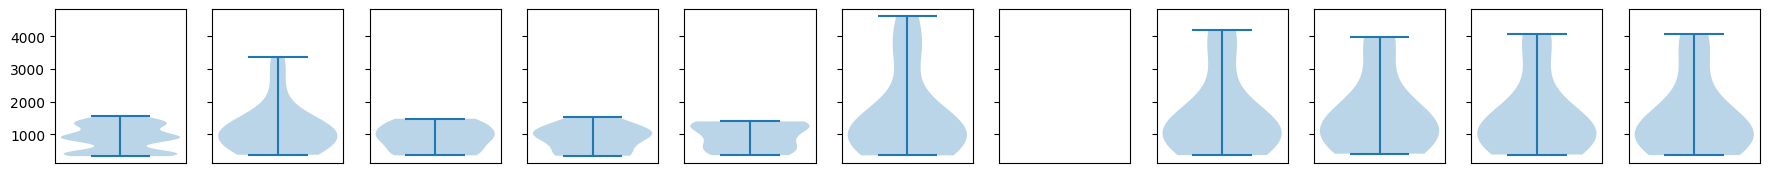

In [99]:
N = 16
COLUMN_NAME = "event_success_time"
fig, ax = plt.subplots(1, len(business_day), figsize=(2*len(business_day), 2), sharey=True)
for i, bd in enumerate(business_day):
    ax[i].xaxis.set_visible(False)
    arr = maestro_data.filter(like=COLUMN_NAME)[(maestro_data["job_name"] == jobs[N]) & (maestro_data["business-day"] == bd)]
    nparr = arr.to_numpy()
    try:
        q01, q99 = np.quantile(nparr, 0.05), np.quantile(nparr, 0.95)
        ax[i].violinplot(arr[(q01 < arr["event_success_time"]) & (arr["event_success_time"] < q99)], range(1), )
    except:
        print(f"{jobs[N]}, has no entries for BD == {bd}")

In [199]:
N = 16
columns_label = {"skip-mdl-out", "batch-workflow", "flow-type",
    "rules-branch", "business-day", "batch-instance-seq", "ib-run-id",
    "hac-run-id", "regulatory-approaches", "processing-location"
}
# "event_success_time"
labelizer = dict.fromkeys(columns_label, None)
maestro_cut = maestro_data[list(columns_label) + ["event_success_time"]][maestro_data["job_name"] == jobs[N]]
# maestro_times = maestro_cut.pop("event_success_time")

In [185]:
# for i, item in enumerate(list(columns_label)):
#     labelizer[item] = sk_pre.LabelEncoder()
#     labelizer[item].fit(list(set(maestro_cut[item])))
#     maestro_cut[item] = labelizer[item].fit_transform(maestro_cut[item])

# x_train, x_test, y_train, y_test = sk_mos.train_test_split(maestro_cut, maestro_times)

# decomp = sk_dec.FactorAnalysis()
# decomp.fit(x_train)

FactorAnalysis()

In [203]:
famd = prince.FAMD(n_components=11, n_iter=30, copy=True)
famd.fit(maestro_cut)

FAMD(n_components=11, n_iter=30)

In [208]:
famd.column_coordinates_

component,0,1,2,3,4,5,6,7,8,9,10
variable,,,,,,,,,,,
batch-instance-seq,3.017140e-05,1.933628e-04,5.625723e-03,1.921728e-03,2.473966e-04,8.657089e-07,8.264107e-04,4.516209e-25,5.255289e-28,5.217056e-28,7.186155e-28
ib-run-id,1.923431e-03,4.826021e-01,2.943295e-02,1.092369e-05,3.955076e-01,5.258125e-09,8.119027e-08,5.190733e-29,2.409418e-31,3.008175e-31,1.433904e-32
hac-run-id,1.169322e-02,5.050252e-01,2.954534e-02,1.149390e-05,3.701495e-01,2.035786e-08,7.779579e-08,5.304976e-29,3.113688e-31,6.137915e-32,2.654254e-31
event_success_time,2.934528e-02,6.953250e-01,1.187537e-01,3.109890e-05,4.639959e-02,8.109473e-04,6.194418e-08,1.067275e-26,6.639012e-28,3.276651e-28,1.741210e-26
batch-workflow,1.505034e-01,7.174183e-01,9.824485e-01,9.999501e-01,7.948605e-02,2.800751e-05,4.565017e-06,1.663717e-27,1.781079e-29,2.017465e-29,6.815417e-28
business-day,9.696200e-01,5.607030e-01,3.131971e-02,1.774115e-05,7.932056e-01,9.999787e-01,9.999197e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
flow-type,9.587956e-01,3.621978e-02,5.566042e-04,9.319922e-07,2.922711e-03,2.149754e-07,1.114171e-11,2.621564e-30,2.016748e-31,8.485332e-32,4.590663e-30
processing-location,1.505034e-01,7.174183e-01,9.824485e-01,9.999501e-01,7.948605e-02,2.800751e-05,4.565017e-06,1.663717e-27,1.781079e-29,2.017465e-29,6.815417e-28
regulatory-approaches,2.116764e-34,2.634484e-33,1.298990e-32,2.854778e-33,2.681636e-33,8.801898e-34,6.963151e-35,2.258293e-33,2.236314e-33,1.307741e-33,6.451771e-33
